<a href="https://colab.research.google.com/github/sandeep328/html/blob/main/Property_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
file1 = pd.read_csv('/content/Property_Price_Train.csv')

In [ ]:
file1.shape

(1459, 81)

In [ ]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

Build a Base Model

Seperate the columns based on data type

In [ ]:
category_columns = file1.columns[file1.dtypes=='object']

numeric_columns = file1.columns[file1.dtypes!='object']

Build the data

In [ ]:
category_data = file1[category_columns]  #Category data

In [ ]:
category_data.head()

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Quality,Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition
0,RLD,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RLD,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,Gable,SS,MetalSd,MetalSd,None,TA,TA,CB,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RLD,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RLD,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,Gable,SS,Wd Sdng,Wd Shng,None,TA,TA,BT,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,TF,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RLD,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
numeric_data = file1[numeric_columns] #Numeric data

In [ ]:
numeric_data.head()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000


In [ ]:
data = numeric_data

In [ ]:
data.head()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000


In [ ]:
data.shape

(1459, 38)

In [ ]:
data.columns

Index(['Id', 'Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [ ]:
data1 = data.drop(columns=['Id'])

In [ ]:
data1.isna().sum().sort_values(ascending=False)

Lot_Extent                   259
Garage_Built_Year             81
Brick_Veneer_Area              8
Sale_Price                     0
BsmtUnfSF                      0
Grade_Living_Area              0
LowQualFinSF                   0
Second_Floor_Area              0
First_Floor_Area               0
Total_Basement_Area            0
BsmtFinSF1                     0
BsmtFinSF2                     0
Underground_Half_Bathroom      0
Remodel_Year                   0
Construction_Year              0
House_Condition                0
Overall_Material               0
Lot_Size                       0
Underground_Full_Bathroom      0
Full_Bathroom_Above_Grade      0
Year_Sold                      0
Open_Lobby_Area                0
Month_Sold                     0
Miscellaneous_Value            0
Pool_Area                      0
Screen_Lobby_Area              0
Three_Season_Lobby_Area        0
Enclosed_Lobby_Area            0
W_Deck_Area                    0
Half_Bathroom_Above_Grade      0
Garage_Are

Replace the missing values

In [ ]:
data1['Lot_Extent'].fillna(data1['Lot_Extent'].median(),inplace=True)

data1['Garage_Built_Year'].fillna(data1['Garage_Built_Year'].median(),inplace=True)

data1['Brick_Veneer_Area'].fillna(data1['Brick_Veneer_Area'].median(),inplace=True)         

In [ ]:
data1.isna().sum().sort_values(ascending=False)

Sale_Price                   0
Underground_Half_Bathroom    0
Grade_Living_Area            0
LowQualFinSF                 0
Second_Floor_Area            0
First_Floor_Area             0
Total_Basement_Area          0
BsmtUnfSF                    0
BsmtFinSF2                   0
BsmtFinSF1                   0
Brick_Veneer_Area            0
Remodel_Year                 0
Construction_Year            0
House_Condition              0
Overall_Material             0
Lot_Size                     0
Lot_Extent                   0
Underground_Full_Bathroom    0
Full_Bathroom_Above_Grade    0
Year_Sold                    0
Half_Bathroom_Above_Grade    0
Month_Sold                   0
Miscellaneous_Value          0
Pool_Area                    0
Screen_Lobby_Area            0
Three_Season_Lobby_Area      0
Enclosed_Lobby_Area          0
Open_Lobby_Area              0
W_Deck_Area                  0
Garage_Area                  0
Garage_Size                  0
Garage_Built_Year            0
Fireplac

In [ ]:
data1.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000


Selecting features and target using loc method

In [ ]:
X = data1.loc[:,['Building_Class', 'Lot_Extent', 'Lot_Size', 
                 'Overall_Material','House_Condition', 'Construction_Year', 
                 'Remodel_Year','Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 
                 'BsmtUnfSF','Total_Basement_Area', 'First_Floor_Area', 
                 'Second_Floor_Area','LowQualFinSF', 'Grade_Living_Area', 
                 'Underground_Full_Bathroom','Underground_Half_Bathroom', 
                 'Full_Bathroom_Above_Grade','Half_Bathroom_Above_Grade', 
                 'Bedroom_Above_Grade','Kitchen_Above_Grade', 'Rooms_Above_Grade', 
                 'Fireplaces','Garage_Built_Year', 'Garage_Size', 'Garage_Area', 
                 'W_Deck_Area','Open_Lobby_Area', 'Enclosed_Lobby_Area', 
                 'Three_Season_Lobby_Area','Screen_Lobby_Area', 'Pool_Area', 
                 'Miscellaneous_Value', 'Month_Sold','Year_Sold']]
                 
y= data1.loc[:,'Sale_Price']

Selecting columns based on iloc

In [ ]:
X = data1.iloc[:,:-1]

y = data1.iloc[:,-1]

In [ ]:
import sklearn

from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.70,test_size=0.30)

In [ ]:
print('Xtrain size is=',Xtrain.shape)
print('Xtest size is=',Xtest.shape)
print('ytrain size is=',ytrain.shape)
print('ytest size is=',ytest.shape)

Xtrain size is= (1021, 36)
Xtest size is= (438, 36)
ytrain size is= (1021,)
ytest size is= (438,)


Build a multiple regression model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check the results

In [ ]:
model.intercept_

-185096.8419347981

In [ ]:
model.coef_

array([-1.75414141e+02, -1.18196285e+02,  4.16192960e-01,  1.78419653e+04,
        6.08336608e+03,  3.46013947e+02,  9.40024042e+01,  3.33169592e+01,
        4.75039950e+00, -5.60144963e-02,  2.55080740e+00,  7.24519241e+00,
        1.76218379e+01,  2.18143227e+01, -7.55658125e+00,  3.18795793e+01,
        1.37028520e+04,  2.86290584e+03,  2.80451033e+03, -4.49147877e+03,
       -7.62868474e+03, -1.29712812e+04,  3.42591190e+03,  6.60112658e+03,
        9.05691903e+01,  1.13846222e+04, -2.47171494e+00,  3.09626414e+00,
        5.59131511e-01, -2.19639443e+00,  3.26619827e+01,  6.10235879e+01,
       -2.17056899e-01, -2.04054718e-02,  2.51241591e+02, -4.60039245e+02])

In [ ]:
data1.columns

Index(['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [ ]:
ypred = model.predict(Xtest)

In [ ]:
ypred

array([150638.88206955, 197887.72356529, 156318.69734309, 247801.02820348,
        42804.64469524, 179605.83127907, 137209.40016833, 122302.07205235,
        83116.33780978, 111980.62013995, 155346.28859199, 120735.55079581,
       318025.45179762, 126681.77997448, 290698.47906056, 187877.55109705,
       178445.23486806, 147934.68920495, 218378.86043512, 327145.9926849 ,
       112263.73836025, 303511.50063528, 156040.91493547, 305616.95363509,
       300798.76532904, 233435.00495244,  72671.12876841, 220075.42741127,
        46036.87792355, 141150.88896684, 131844.56105637, 175437.66511273,
       116555.00607719, 201240.8887767 , 304708.34899888, 209721.91860911,
       208740.20245843, 185554.51743983, 153942.43966174, 202965.81974312,
       167622.96613711,  93521.50402395, 240184.56693667, 110549.04798617,
       198984.15414483, 205019.16226814, 120322.48143806, 128661.05163904,
       172307.12676493, 131243.29408459, 218907.71033926, 156699.06080811,
       106742.95594702, 2

In [ ]:
ytest

1160    146000
1210    189000
831     151000
1158    235128
1321     72500
         ...  
1243    465000
124     181000
974     167500
793     225000
894     118858
Name: Sale_Price, Length: 438, dtype: int64

Model Evaluation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


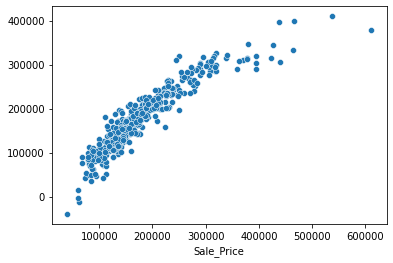

In [ ]:
sns.scatterplot(ytest,ypred)

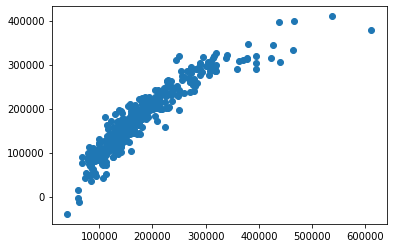

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(ytest,ypred)

In [ ]:
Accuracy = sklearn.metrics.r2_score(ytest,ypred)
print(Accuracy)

0.851779329335862


In [ ]:
RMSE = sklearn.metrics.mean_squared_error(ytest,ypred)
print(RMSE)

884266908.6730703


1st case 75/25 0.839 and 1130839716.4587467

2nd case 80/20 0.813 and 1344652461.6812384

3rd case 85/15 0.781 and 1599437871.3807077

4th case 70/30 0.851 and 884266908.6730703

With New Data sets you have to do

In [ ]:
ynew = model.predict(data2)  #data2 is cleaned data from file2